# Paria Rezayan
# Clustering using DBSCAN, OPTICS, and Agglomerative Hierarchical Clustering

The dataset used in this project can be found on https://www.kaggle.com/datasets/shwetabh123/mall-customers .


# Introduction
Clustering is a technique used in data analysis and machine learning to group similar data points together. In this project, I will use three different clustering algorithms, DBSCAN, OPTICS, and Agglomerative Clustering,, to cluster customers of a retail store based on their annual income and spending score.

# Dataset
I will be using a dataset containing information about customers of a mall. The dataset has the following features:

1) CustomerID: unique identifier for each customer
2) Genre: gender of the customer
3) Age: age of the customer
4) Annual Income (k$): annual income of the customer in thousands of dollars
5)Spending Score (1-100): score assigned by the retailer based on customer behavior and spending nature


# Objective
My objective for this project is to cluster the customers into different groups based on their annual income and spending score. This will help understand which groups of customers are more valuable to the business and how we can target them effectively.

# Methodology
I will be using three different clustering algorithms in this project:

1) Density-Based Spatial Clustering of Applications with Noise (DBSCAN): A density-based clustering algorithm that groups together points that are close to each other and separates them from points that are far away.
2) Ordering Points To Identify Cluster Structure (OPTICS): A density-based clustering algorithm that identifies clusters of varying densities and sizes by ordering points based on their connectivity.
3) Agglomerative Clustering: A hierarchical clustering algorithm that starts with each point as its own cluster and gradually merges them into larger and larger clusters based on their distance.


# Steps
The following are the steps we will follow in this clustering project:

1) Import Libraries: We will import necessary libraries such as pandas, numpy, matplotlib, and scikit-learn to perform clustering.
2) Load Data: We will load the customer dataset into a pandas dataframe and perform exploratory data analysis to get insights into the data.
3) Data Preprocessing: We will preprocess the data to remove any missing values, drop unnecessary columns, and scale the data.
Visualize Data Distribution: We will create histograms to visualize the distribution of each variable in the dataset.
4) DBSCAN Clustering: We will apply DBSCAN algorithm to cluster the customers into different groups based on their annual income and spending score.
5) OPTICS Clustering: We will apply OPTICS algorithm to cluster the customers into different groups based on their annual income and spending score.
6) Agglomerative Clustering: We will apply agglomerative clustering algorithm to cluster the customers into different groups based on their annual income and spending score.
7) Visualization: We will visualize the clusters using scatter plots and other visualizations.
8) Interpretation: We will interpret the results and draw conclusions about the customer segments.

In [13]:
# importing the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [14]:
# loading the data 
data = pd.read_csv('Mall_customers.csv')

# Exploring the dataset:

In [15]:
# getting to know the dataset
data.shape

(200, 5)

The raw data consists of 200 rows and 5 columns.

Having known the shape of the data, it is time to familiarize ourselves with some additional information about the data:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Attribute Information:

1) CustomerID
2) Gendre
3) Age 
4) Annual Income (k$)
5) Spending Score (1-100)

In [17]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
# cheking for total count of NaN values
print(data.isnull().sum().sum())

0


In [20]:
# checking for non-numeric data points
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

As demonstrated, all the features, except for the 'Genre' column, contain numerical values.

In [21]:
# converting gender to numerical data
data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})
print(data['Genre'])

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Genre, Length: 200, dtype: int64


In [31]:
# exploring the variables in the columns
var_names = ["CustomerID", "Genre", "Age", "Annual Income (k$)", "Spending Score (1-100)"]
for i in var_names:
    print(i)
    print(data[i].unique())

CustomerID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
Genre
[0 1]
Age
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
Ann

# Data Visualization and Preprocessing:

Next, we create a histogram to visualize data distribution: 

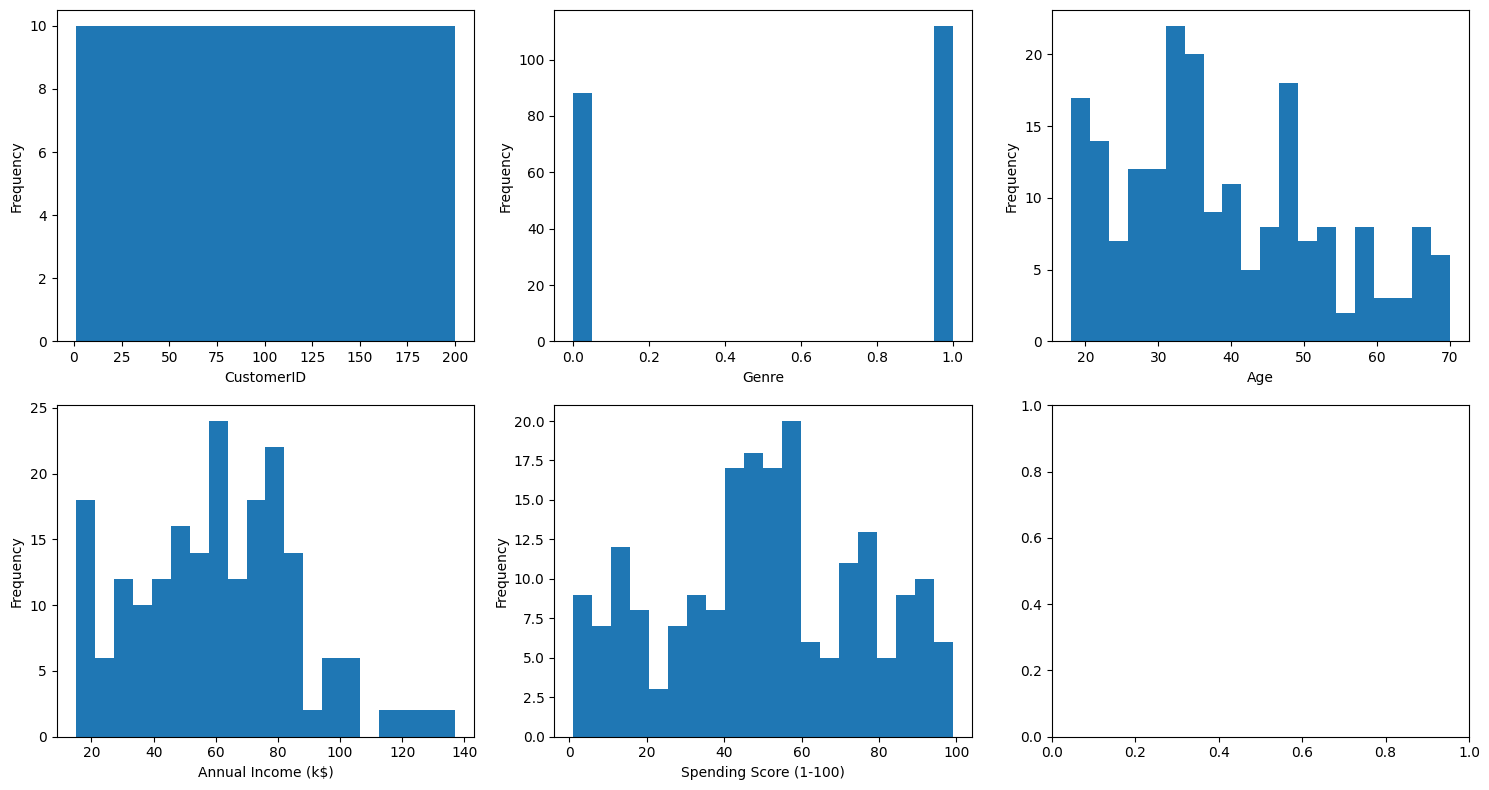

In [32]:
# creating a figure with 5 rows and 3 columns of subplots to visualize data distribution
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15,8))

for i, var in enumerate(var_names):
    row = i // 3 
    col = i % 3 
    axs[row][col].hist(data[var], bins=20)
    axs[row][col].set_xlabel(var)
    axs[row][col].set_ylabel("Frequency")


plt.tight_layout()
plt.show()

In [24]:
# defining the feature vector 
x = data.iloc[:, [3,4]].values

In [25]:
print(x[0:10])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


In [27]:
# feature scaling using Standard Scaler
scaler = StandardScaler()
model = scaler.fit(x)
scaled_x = model.transform(x)
print(scaled_x)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

In [28]:
print(type(scaled_x))

<class 'numpy.ndarray'>


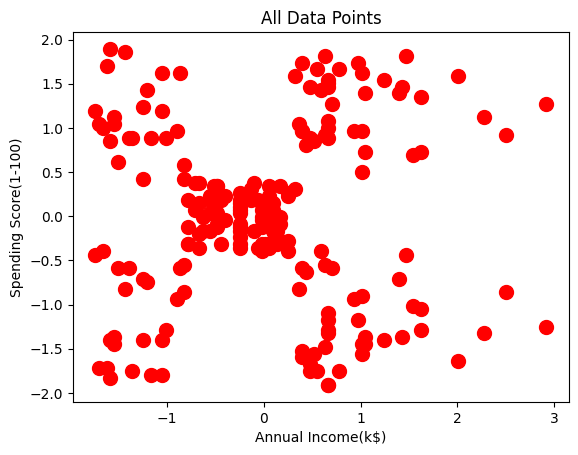

In [33]:
# visualising the data after scaling it 
plt.scatter(scaled_x[:, 0], scaled_x[:, 1], s = 100, c = 'red', label ='Data Points')
plt.title('All Data Points')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

# Model Implementation:

# 1) **K-Nearest Neighbors**:

Prior to traninging our K-Nearest Neighbors model, we need to asceratin the optimal value for epsilon. 

**Getting optimal value for epsilon** :


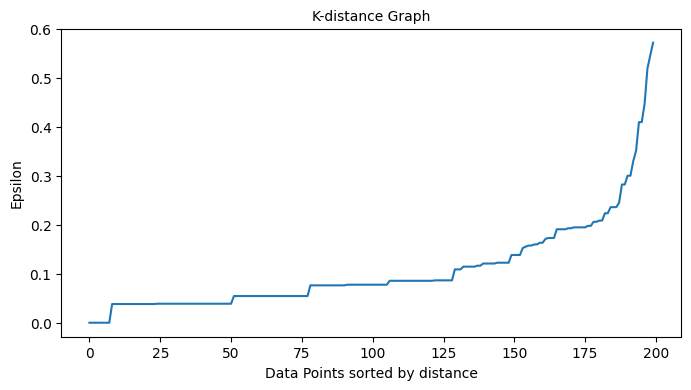

In [34]:
# creating an instance of KNN class with 2 neighbors
neigh = NearestNeighbors(n_neighbors=2)

# finding the distances and indices of the k nearest neighbors
nbrs = neigh.fit(scaled_x)
distances, indices = nbrs.kneighbors(scaled_x)

# sorting the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# plotting distances to determine an optimal value for epsilon
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()


According to the graph above, 0.3 seems to be a good value for epsilon. 

In [35]:
# defining and fitting the KNN model
model = DBSCAN(eps = 0.3 , min_samples =5)
clusters = model.fit_predict(scaled_x)
print(model.labels_)

[ 2  0  1  0  2  0  1 -1  1  0 -1 -1 -1  0  1  0  2  0  2 -1  2  0  1  0
 -1 -1  2 -1  2 -1 -1  0 -1 -1 -1 -1 -1  0 -1  0  3 -1  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  4  3  4  3  4  5  4  5  4  3  4  5  4  5  4  5  4  5  4  3  4
  5  4  3  4  5  4  5  4  5  4  5  4  5  4  5  4  3  4  5  4  6  4  6  4
  6 -1  6  4  6  4  6  4  6  4  6  4 -1  4  6  4 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [36]:
# counting the total number of clusters 
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print("Total number of clusters:", num_clusters)

Total number of clusters: 7


In [37]:
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

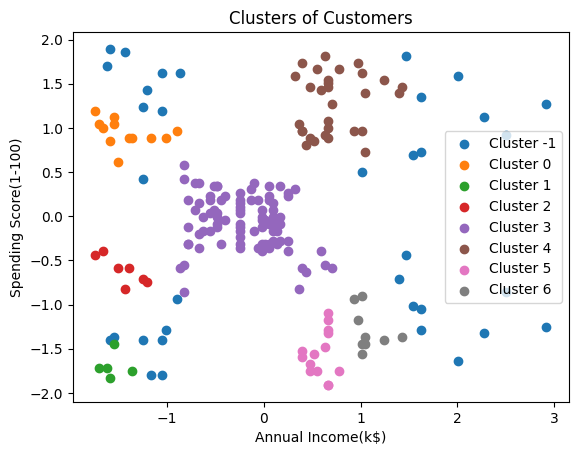

In [43]:
# plotting the clusters after running KNN
for i in range(-1, max(clusters)+1):
    plt.scatter(scaled_x[clusters == i, 0], scaled_x[clusters == i, 1], label=f'Cluster {i}')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

# 2) OPTICS: 

In [38]:
# defining and fitting the OPTICS model
model_2 = OPTICS(min_samples=5)
clusters_2 = model_2.fit_predict(scaled_x)
print(model_2.labels_)

[-1  5  8  5 -1  5  8 -1  8  5  8 -1  8  5  8  5  0  5  0 -1  0  5  8  5
  8 -1  0 -1  0 -1  8  5  8 -1  8 -1 -1 -1 -1  5 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1 -1  2  2 -1  2 -1  2  2 -1 -1  2 -1 -1  2 -1  3 -1  4  3  4  4 -1
  3  3  4  3  4  3 -1 -1 -1  4  3  3  4  3  3 -1  4  3  3  3  4 -1 -1 -1
 -1 -1 -1 10 -1  9 -1 10 -1  9  6  9 -1  9  6 10  6  9  6  9  6 10 -1 10
 -1 10 -1  9 -1 10 -1 10 -1  9 -1 10  6  9  6  9 -1  9  6 10  7 -1  7 10
  7 -1  7 -1  7 10  7 10  7 -1  7 -1 -1 -1  7 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [39]:
# counting the total number of clusters 
num_clusters_2 = len(set(clusters_2)) - (1 if -1 in clusters_2 else 0)
print("Total number of clusters:", num_clusters_2)

Total number of clusters: 11


In [40]:
np.unique(clusters_2)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

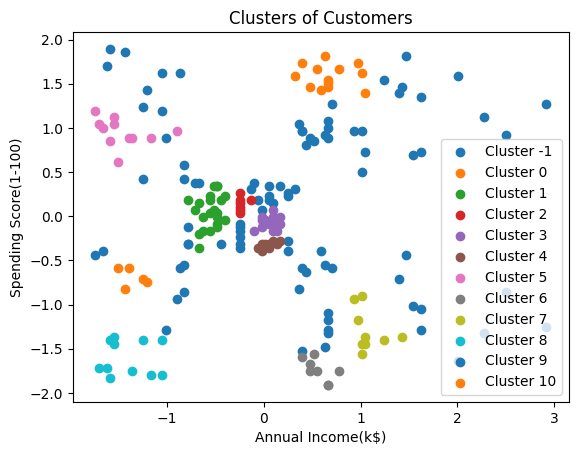

In [44]:
# plotting the clusters after running OPTICS
for i in range(-1, max(clusters_2)+1):
    plt.scatter(scaled_x[clusters_2 == i, 0], scaled_x[clusters_2 == i, 1], label=f'Cluster {i}')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

# 3) Agglomerative Hierarchical Clustering: 

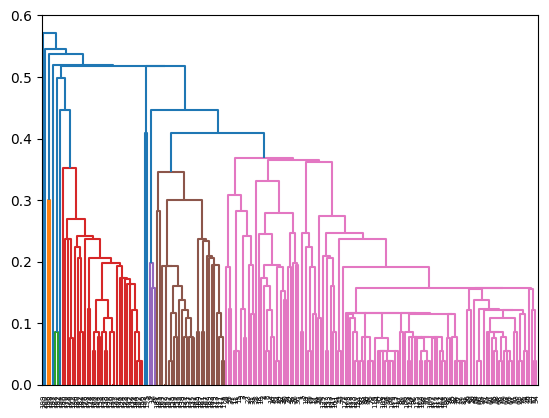

In [45]:
# performing hierarchical clustering on the data using single linkage method
linked = linkage(scaled_x, 'single')
labellist = range(1,201)

# plotting the dendrogram with the linked clusters and corresponding labels
dendrogram(linked, labels = labellist)
plt.show()

Based on the figure above, 5 seems like a good number for our model:

In [56]:
# defining and fitting the Agglomerative Hierarchical Clustering model
model_3 = AgglomerativeClustering(n_clusters=5, linkage='single')
clusters_3 = model_3.fit_predict(scaled_x)
print(model_3.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 4 1 3 2]


In [48]:
# counting the total number of clusters 
num_clusters_3 = len(set(clusters_3)) - (1 if -1 in clusters_3 else 0)
print("Total number of clusters:", num_clusters_3)

Total number of clusters: 5


In [49]:
np.unique(clusters_3)

array([0, 1, 2, 3, 4], dtype=int64)

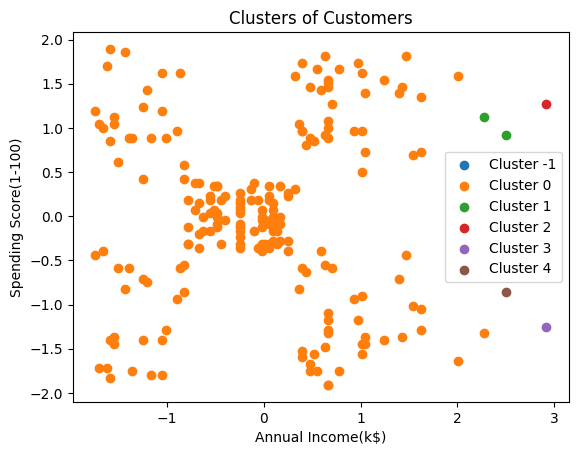

In [50]:
# plotting the clusters after running Agglomerative Hierarchical Clustering model 
for i in range(-1, max(clusters_3)+1):
    plt.scatter(scaled_x[clusters_3 == i, 0], scaled_x[clusters_3 == i, 1], label=f'Cluster {i}')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

# Conclusion
In this project, clustering was performed on a customer dataset using DBSCAN, OPTICS, and Agglomerative Clustering algorithms. I was able to cluster the customers into different groups based on their annual income and spending score. These insights can be used by the business to target specific customer segments more effectively and increase revenue.